# Reliance Stock Prediction

### dependent variable = Close Price

### 1. Import required packages

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### Read the data from the Source

In [2]:
stock_data = pd.read_csv('reliance_stock_data_(1990-2023).csv')
stock_data

,Date,Price,Open,High,Low,Volume,Change%
0,Jan 02 1990,7.27,7.31,7.44,7.14,0,-1.62%
1,Jan 03 1990,6.92,7.18,7.18,6.84,0,-4.81%
2,Jan 04 1990,6.50,6.24,6.58,6.24,0,-6.07%
3,Jan 05 1990,6.71,6.37,6.71,6.37,0,3.23%
4,Jan 08 1990,6.71,7.05,7.05,6.67,0,0.00%
...,...,...,...,...,...,...,...
8175,Dec 11 2023,2459.05,2452.15,2467.40,2452.15,169.52K,+0.12%
8176,Dec 12 2023,2423.95,2458.00,2464.90,2420.25,98.11K,-1.43%
8177,Dec 13 2023,2433.40,2427.75,2438.00,2406.30,137.30K,+0.39%
8178,Dec 14 2023,2464.50,2453.00,2475.00,2442.70,3.65M,+1.28%


stock_data = stock_data.rename(columns={' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Volume':'Volume',' Change%':'Change%'})

In [3]:
stock_data.set_index(pd.to_datetime(stock_data['Date']))

,Date,Price,Open,High,Low,Volume,Change%
Date,,,,,,,
1990-01-02,Jan 02 1990,7.27,7.31,7.44,7.14,0,-1.62%
1990-01-03,Jan 03 1990,6.92,7.18,7.18,6.84,0,-4.81%
1990-01-04,Jan 04 1990,6.50,6.24,6.58,6.24,0,-6.07%
1990-01-05,Jan 05 1990,6.71,6.37,6.71,6.37,0,3.23%
1990-01-08,Jan 08 1990,6.71,7.05,7.05,6.67,0,0.00%
...,...,...,...,...,...,...,...
2023-12-11,Dec 11 2023,2459.05,2452.15,2467.40,2452.15,169.52K,+0.12%
2023-12-12,Dec 12 2023,2423.95,2458.00,2464.90,2420.25,98.11K,-1.43%
2023-12-13,Dec 13 2023,2433.40,2427.75,2438.00,2406.30,137.30K,+0.39%


In [4]:
stock_data.columns

Index(['Date', ' Price', ' Open', ' High', ' Low', ' Volume', ' Change%'], dtype='object')

In [5]:
stock_data = stock_data.rename(columns={' Price':'Price',' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Volume':'Volume',' Change%':'Change%'})

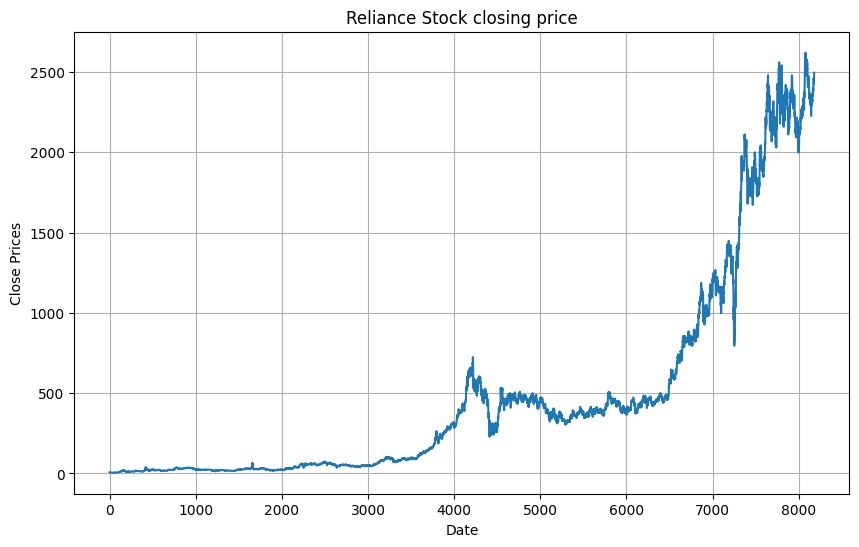

In [6]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Price'])
plt.title('Reliance Stock closing price')
plt.show()

<Axes: ylabel='Density'>

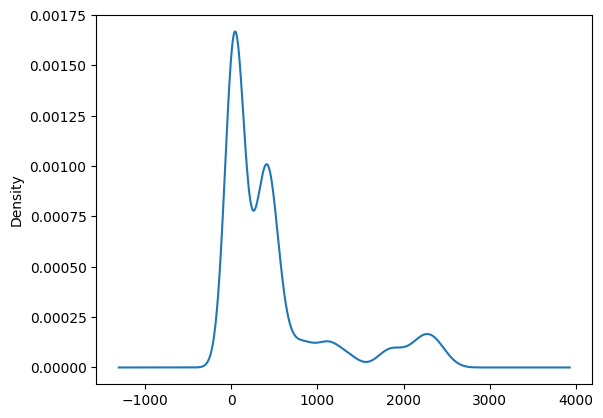

In [7]:
#Distribution of the dataset
df_close = stock_data['Price']
df_close.plot(kind='kde')

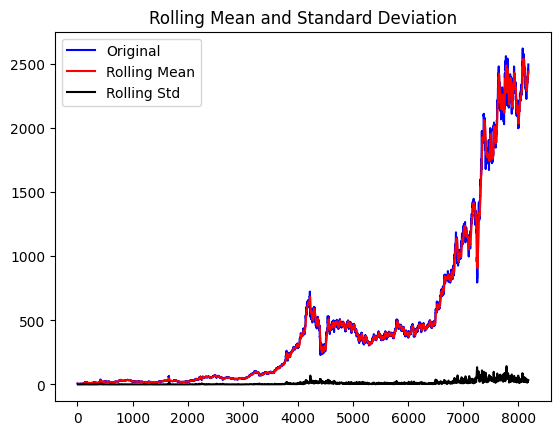

Results of dickey fuller test
Test Statistics                   1.778975
p-value                           0.998306
No. of lags used                 37.000000
Number of observations used    8142.000000
critical value (1%)              -3.431153
critical value (5%)              -2.861895
critical value (10%)             -2.566959
dtype: float64


In [8]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 640x480 with 0 Axes>

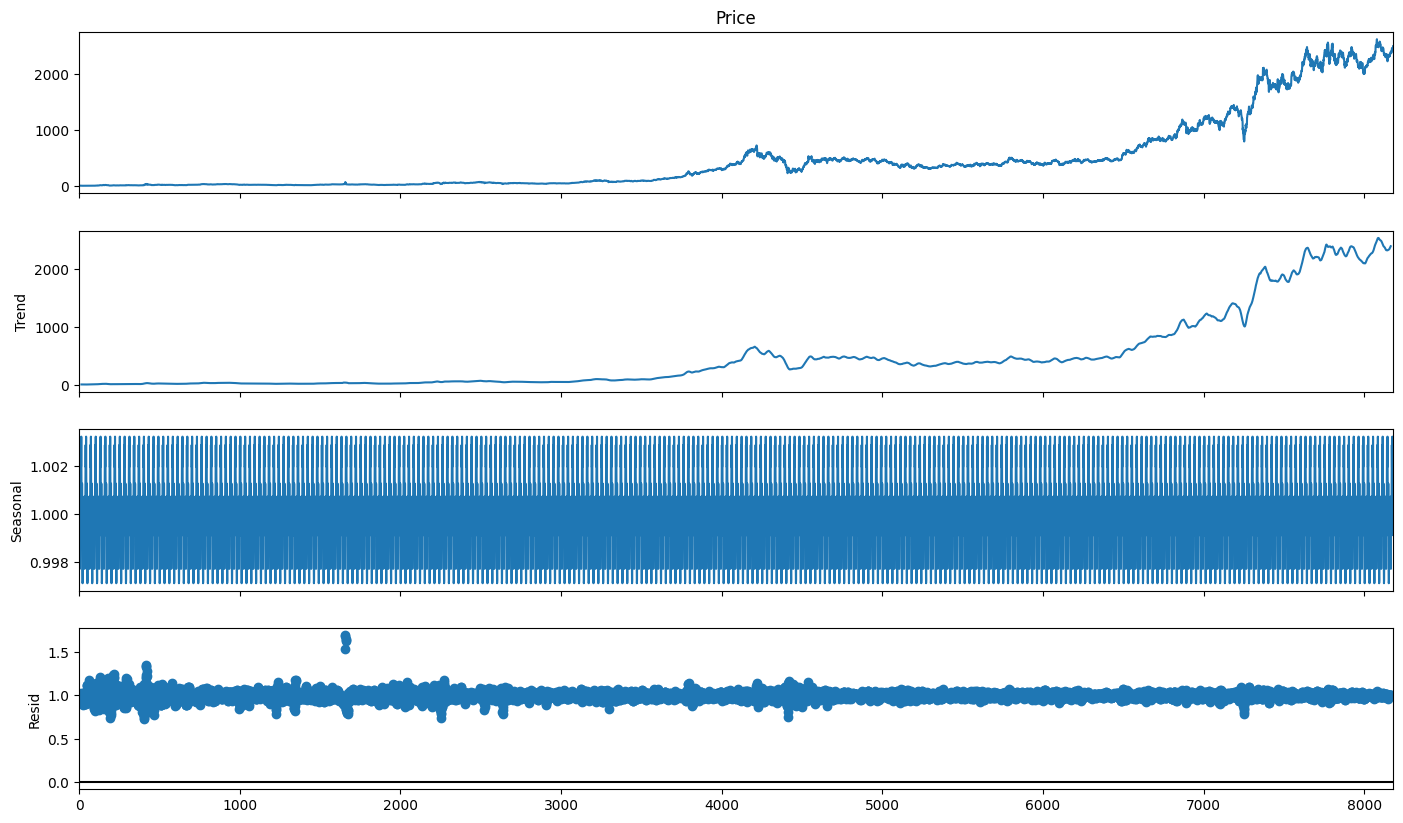

In [9]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


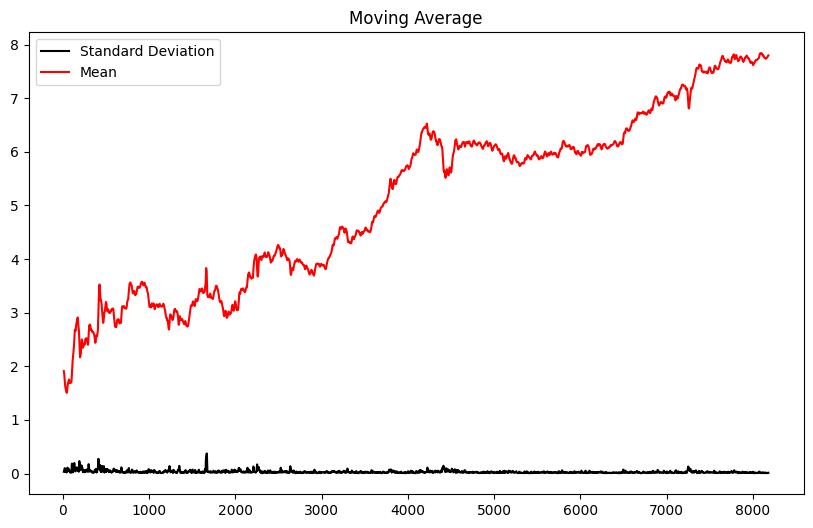

In [10]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

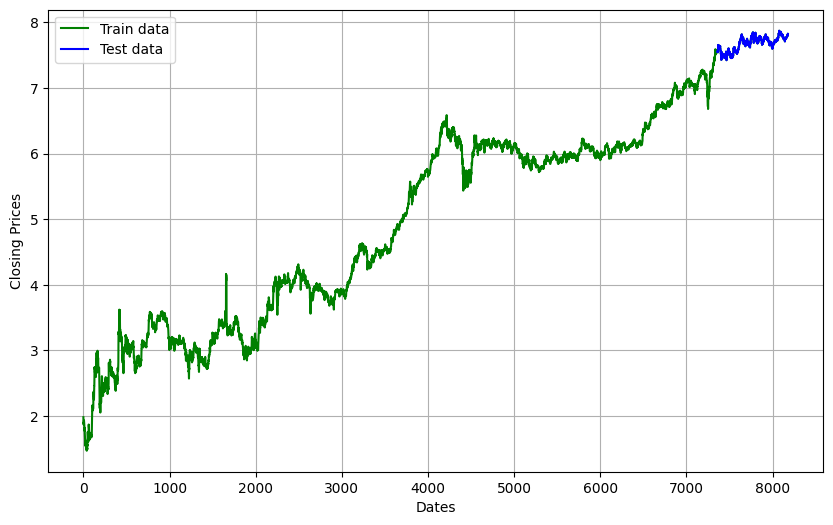

In [11]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-31200.669, Time=0.96 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-31208.879, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31208.607, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-31197.541, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-31208.050, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31207.649, Time=2.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-31205.388, Time=3.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-31206.124, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 10.232 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7359
Model:               SARIMAX(1, 1, 0)   Log Likelihood               15607.440
Date:                Tue, 19 Dec 2023   AIC                         -31208.879
Time:              

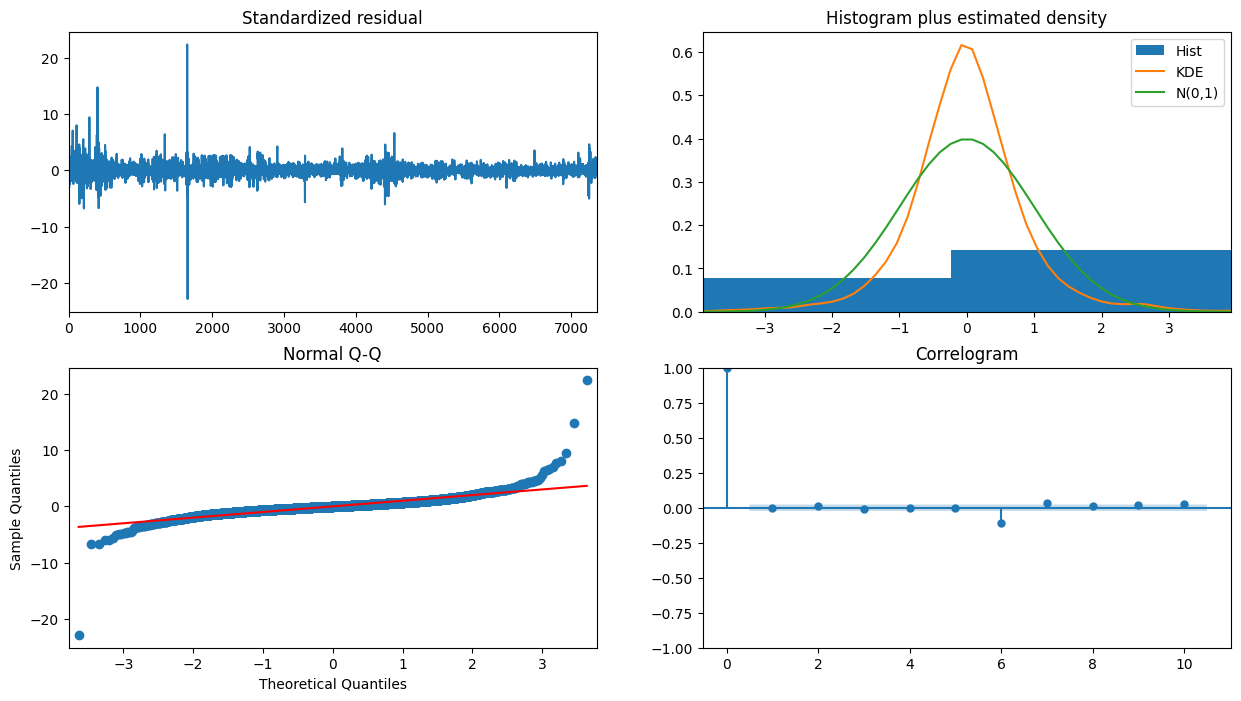

In [16]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [17]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(4,1,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 7359
Model:                 ARIMA(4, 1, 0)   Log Likelihood               15605.829
Date:                Tue, 19 Dec 2023   AIC                         -31201.657
Time:                        18:32:50   BIC                         -31167.139
Sample:                             0   HQIC                        -31189.793
                               - 7359                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0375      0.006      5.867      0.000       0.025       0.050
ar.L2          0.0135      0.007      1.931      0.054      -0.000       0.027
ar.L3         -0.0057      0.008     -0.680      0.4

In [18]:
# Forecast
return_value = fitted.forecast(820, alpha=0.05)  # 95% conf

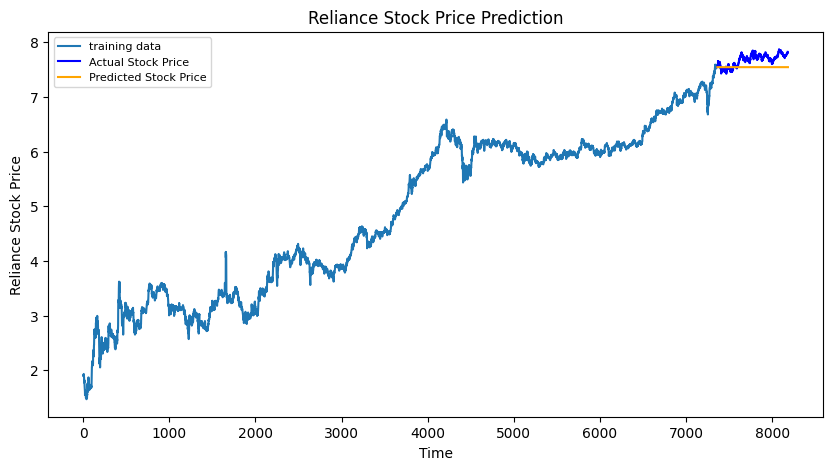

In [19]:
# Make a pandas series
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(return_value, color = 'orange',label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()